In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# ml based import
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('../datasets/diamond_pricing.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paleonium  1000 non-null   int64  
 1   Pressure   1000 non-null   int64  
 2   Price      1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339
5,41,17016,1616.173790
6,40,19145,747.193426
7,35,17180,1718.235458
8,146,14121,2044.434408
9,120,17102,1147.952682


In [6]:
fig = px.scatter_3d(data_frame=df, x='Paleonium',y='Pressure',z='Price')
fig.show()

In [7]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [8]:
X = df[['Paleonium','Pressure']]
y = df['Price']

In [9]:
xtrain,xtest,ytrain,ytest  = train_test_split(X,y, test_size=.2, random_state=0)

In [10]:
linreg = LinearRegression()
treereg = DecisionTreeRegressor(max_depth=6)

In [11]:
linreg.fit(X,y)
treereg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [12]:
linreg.score(xtest,ytest)*100

12.385225933290943

In [13]:
treereg.score(xtest,ytest)*100

93.35000889589854

In [14]:
forestModel = RandomForestRegressor(n_estimators=500)
forestModel.fit(xtrain,ytrain)
forestModel.score(xtest,ytest) * 100

98.21708187736367

In [15]:
ypredL =  linreg.predict(X)
ypredT =  treereg.predict(X)
ypredR =  forestModel.predict(X)

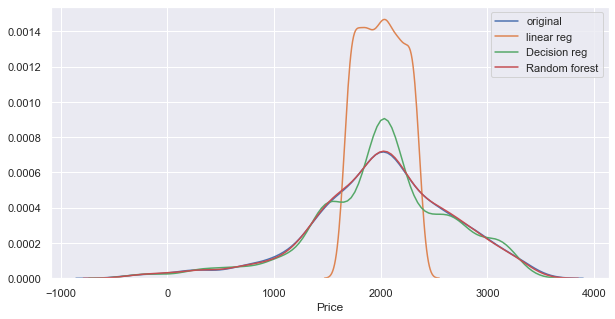

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(y,label='original',hist=False)
sns.distplot(ypredL,label='linear reg',hist=False)
sns.distplot(ypredT,label='Decision reg',hist=False)
sns.distplot(ypredR,label='Random forest',hist=False)
plt.legend()
plt.show()

In [17]:
# model persistance
import pickle
def save_model(modelObj, pathToSave):
    with open(pathToSave,'wb') as f:
        pickle.dump(modelObj,f)
        print('model saved')


In [ ]:
save_model(forestModel, '../models/diamond_price_model.pk')